<a href="https://colab.research.google.com/github/parina15/Medical-Chabot/blob/main/News_Predictation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and Loading datasets

---

In the below code cell , the useful libraries are imported which are pandas , numpy , mathplotlib , sklearn and seaborn.

The "os" modul is imported as it interact with the file system, manage environment variables, run shell commands, and handle directories or processes.

Further , the dataset file is uploaded into th csv format and some of the data is showed which shows that the dataset had been loaded successfully.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Upload the dataset manually in Google Colab
from google.colab import files
uploaded = files.upload()

# Get the filename
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv("True.csv")

# Display the first few rows
print("Dataset Loaded Successfully!")
df.head()


Saving Fake_True.csv to Fake_True (2).csv
Dataset Loaded Successfully!


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Converting Text into Features and Encode Labels


---

In this cell , the categories are labeled by assigning them as 1 and 0. They are then mapped using the seaborn plot , which is according to number of articles in each category.

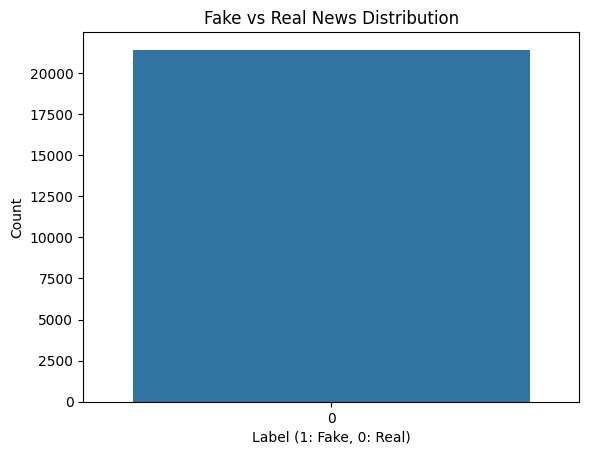

In [ ]:
# Map categories to labels (Modify based on dataset needs)
df['label'] = df['subject'].apply(lambda x: 1 if x in ['left-news', 'News'] else 0)

# Check the distribution of classes
sns.countplot(x=df['label'])
plt.title("Fake vs Real News Distribution")
plt.xlabel("Label (1: Fake, 0: Real)")
plt.ylabel("Count")
plt.show()


Splitting data for model training

---

The code spilts the dataset into training and testing. The "0.2" shows the dataset given for testing and the rest is for model to train.

The train_test_split() along with random_seed = 42 and ".shape"are modules for the model training and showing the number or size of dataset.

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


NameError: name 'train_test_split' is not defined

Training and Evaluation

---

A multinomial Navies Bayes model is best suited for text classificatin as the features are independent. The model is then fitted to predict the accuracy and precision.

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)


Checking classification report and Plotting results

---

After the prediction , the accuracy and classification report is checked and then using the library mathplotlib they are plotted as shown.

Model Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6426

    accuracy                           1.00      6426
   macro avg       1.00      1.00      1.00      6426
weighted avg       1.00      1.00      1.00      6426



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


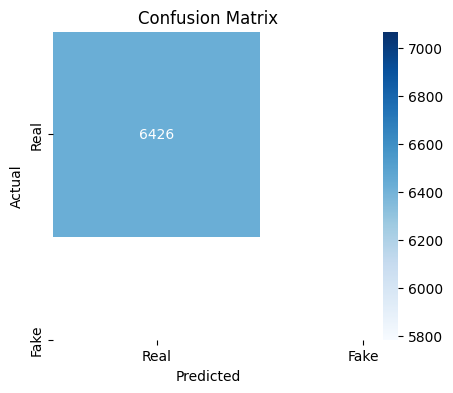

In [ ]:
# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Model Accuracy: {accuracy:.4f}")

# Show classification report
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Model performance interpretation

---

Overfitting – The model memorized the training data instead of generalizing well.

Imbalanced Dataset
 – If one class dominates, the model might just predict the majority class correctly.

Too Simple Data – If the dataset has clear patterns, even a basic model can achieve near-perfect accuracy.


Improvement & Future enhancement

---

Use Deep Learning – Implement LSTM or Transformer models (like BERT) for better text representation and accuracy.

Improve Feature Engineering – Use word embeddings (Word2Vec, GloVe) instead of TF-IDF for richer text understanding.

Use Advanced NLP Models (Transformers like BERT, RoBERTa) - Pretrained models can significantly improve accuracy.

Ensemble Learning – Combine multiple models (Naïve Bayes, SVM, Random Forest) to improve classification robustness.


The best fitted model choice and comparsion

---

1. Naive Bayes (Best for Text Data) – Works well with high-dimensional text, but assumes feature independence, which may limit accuracy.  
2. Random Forest (Handles Non-Linearity) – Captures complex patterns but may be slower and less effective for sparse text data.  
3. SVM (Good for High-Dimensional Data) – Performs well with TF-IDF, but training can be slow for large datasets.  
Best Choice is Naive Bayes or SVM – Naive Bayes is preferred for speed and efficiency, while SVM provides better generalization for complex text data.